In [265]:
#imports 

import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import sys
from PIL import Image

sns.set_style('white')
sns.palplot(sns.color_palette())

%matplotlib inline

In [255]:
# loading the results csv file

csv_path = './results/mnist_attention.csv'
df = pd.read_csv(csv_path)

In [256]:
# overview of the loaded results

df.tail()

,Iteration,Accuracy,NMI,ARI,Loss
138,19320,0.893,0.789,0.789,0.109
139,19460,0.894,0.791,0.791,0.124
140,19600,0.894,0.790,0.790,0.113
141,19740,0.893,0.788,0.788,0.100
142,19880,0.893,0.789,0.789,0.101


In [257]:
def plot_results(dataframe, output_folder, output_file_name, extension='pdf', dpi=1000, plot_type='accuracy', dataset='MNIST'):    
    file_path = os.path.join(output_folder, output_file_name + '.' + extension)
    fig, ax = plt.subplots()
    
    if plot_type == 'accuracy':
        title = 'Unsupervised Learning Accuracy ({})'.format(dataset)
        ax.plot(dataframe.Iteration, dataframe.Accuracy, label='Acc')
        ax.plot(dataframe.Iteration, dataframe.NMI, label='NMI')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy / NMI')
        plt.title(title)
    else:
        title = 'Clustering Loss ({})'.format(dataset)
        ax.plot(dataframe.Iteration, dataframe.Loss, label='Loss')
        plt.xlim(500, 20000)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title(title)
    ax.legend()
    plt.show()
    fig.savefig(file_path, dpi=dpi, bbox_inches='tight')
    
    print("Plot saved")

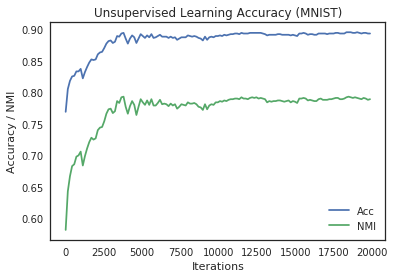

Plot saved


In [258]:
plot_results(df, output_folder='/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/', output_file_name='mnist_attention_accuracy', dataset='MNIST', extension='png')

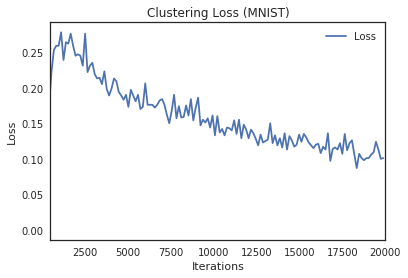

Plot saved


In [259]:
plot_results(df, output_folder='/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/', output_file_name='mnist_attention_loss', plot_type='loss', dataset='MNIST', extension='png')

In [264]:
# code to horizontally stack images to create a combined image.

imgs = ["/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/mnist_lr_acc.png",
"/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/mnist_lr_nmi.png"]

images = map(Image.open, imgs)
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('/home/kumarkm/Dropbox/Courses/Data Mining/ReportTemplate_LaTeX/images/combined_lr_mnist.pdf')